In [1]:
!rm -rf img/ && mkdir -p img

In [2]:
import figtools as ftl
import matplotlib.pyplot as plt
import numpy as np
import torch
from helper import UKF
from helper import generate_data

In [3]:
torch.manual_seed(0)
assert torch.all(torch.randint(10, (10,)) == torch.tensor([4, 9, 3, 0, 3, 9, 7, 3, 7, 3]))

In [4]:
X, X_gt = generate_data(phi=torch.tensor([0., np.pi / 2., np.pi, 3. / 2. * np.pi]),
                        v0=torch.tensor([1., 2., 3., 4.]),
                        noise=torch.tensor([[.5, .5], [.5, .5], [.5, .5], [.5, .5]]),
                        n=30,
                        n_repeat=100)

X.shape

torch.Size([4, 2, 3000])

In [ ]:
def predict(X, n_iter=None):
    b, _, n = X.shape

    if n_iter is None:
        n_iter = n

    ukf = UKF(b=b)
    error = torch.empty((b, 2, n_iter))
    X_pred = torch.empty((b, 3, n_iter))

    for i in range(n_iter):
        X_pred[:, :, i], error[:, :, i] = ukf.step(X[:, :, i])

    return X_pred, torch.abs(error)


X_pred, error = predict(X)

In [6]:
def plot(x, file_name, plt_func, *plt_args, **plt_kwargs):
    with ftl.FigContext():
        fig, ax = plt.subplots()

        b, _, _ = x.shape
        for i in range(b):
            getattr(ax, plt_func)(x[i, 0], x[i, 1], *plt_args, **plt_kwargs)

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')

        ax.set_xlim(-40., 50.)
        ax.set_ylim(-50., 30.)
        ax.grid()

        return ftl.save_fig(fig, file_name)

In [7]:
plot(X_gt, 'gt', 'plot', '-')

Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAABkAAAASwCAIAAAA…

In [8]:
plot(X, 'data', 'scatter', s=1., alpha=.1)

Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAABkAAAASwCAIAAAA…

In [9]:
plot(X_pred[:, :, 90:120], 'ukf', 'plot', '-')

Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAABkAAAASwCAIAAAA…

In [10]:
def plot(x, file_name, ylabel):
    with ftl.FigContext():
        fig, ax = plt.subplots()

        b, n = x.shape
        t = np.arange(n)

        for i in range(b):
            ax.plot(t, x[i])

        ax.set_xlabel('$t$')
        ax.set_ylabel(ylabel)

        ax.grid()

        return ftl.save_fig(fig, file_name)

plot(X_pred[:, 2, 90:150], 'phi', '$\phi$')

Output(outputs=({'output_type': 'display_data', 'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAABkAAAASwCAIAAAA…

In [11]:
def plot(x_measured, x_pred, file_name):
    with ftl.FigContext():
        fig, ax = plt.subplots()

        _, n1 = x_measured.shape
        _, n2 = x_pred.shape
        n = min(n1, n2)

        res = x_measured[:, :n] - x_pred[:, :n]
        b, _ = res.shape
        t = np.arange(n)

        for i in range(b):
            ax.plot(res[i])

        ax.set_xlabel('$t$')
        ax.set_ylabel('measured $-$ predicted')

        ax.grid()

        return ftl.save_fig(fig, file_name)

[Download res_x.png],[Download res_y.png]

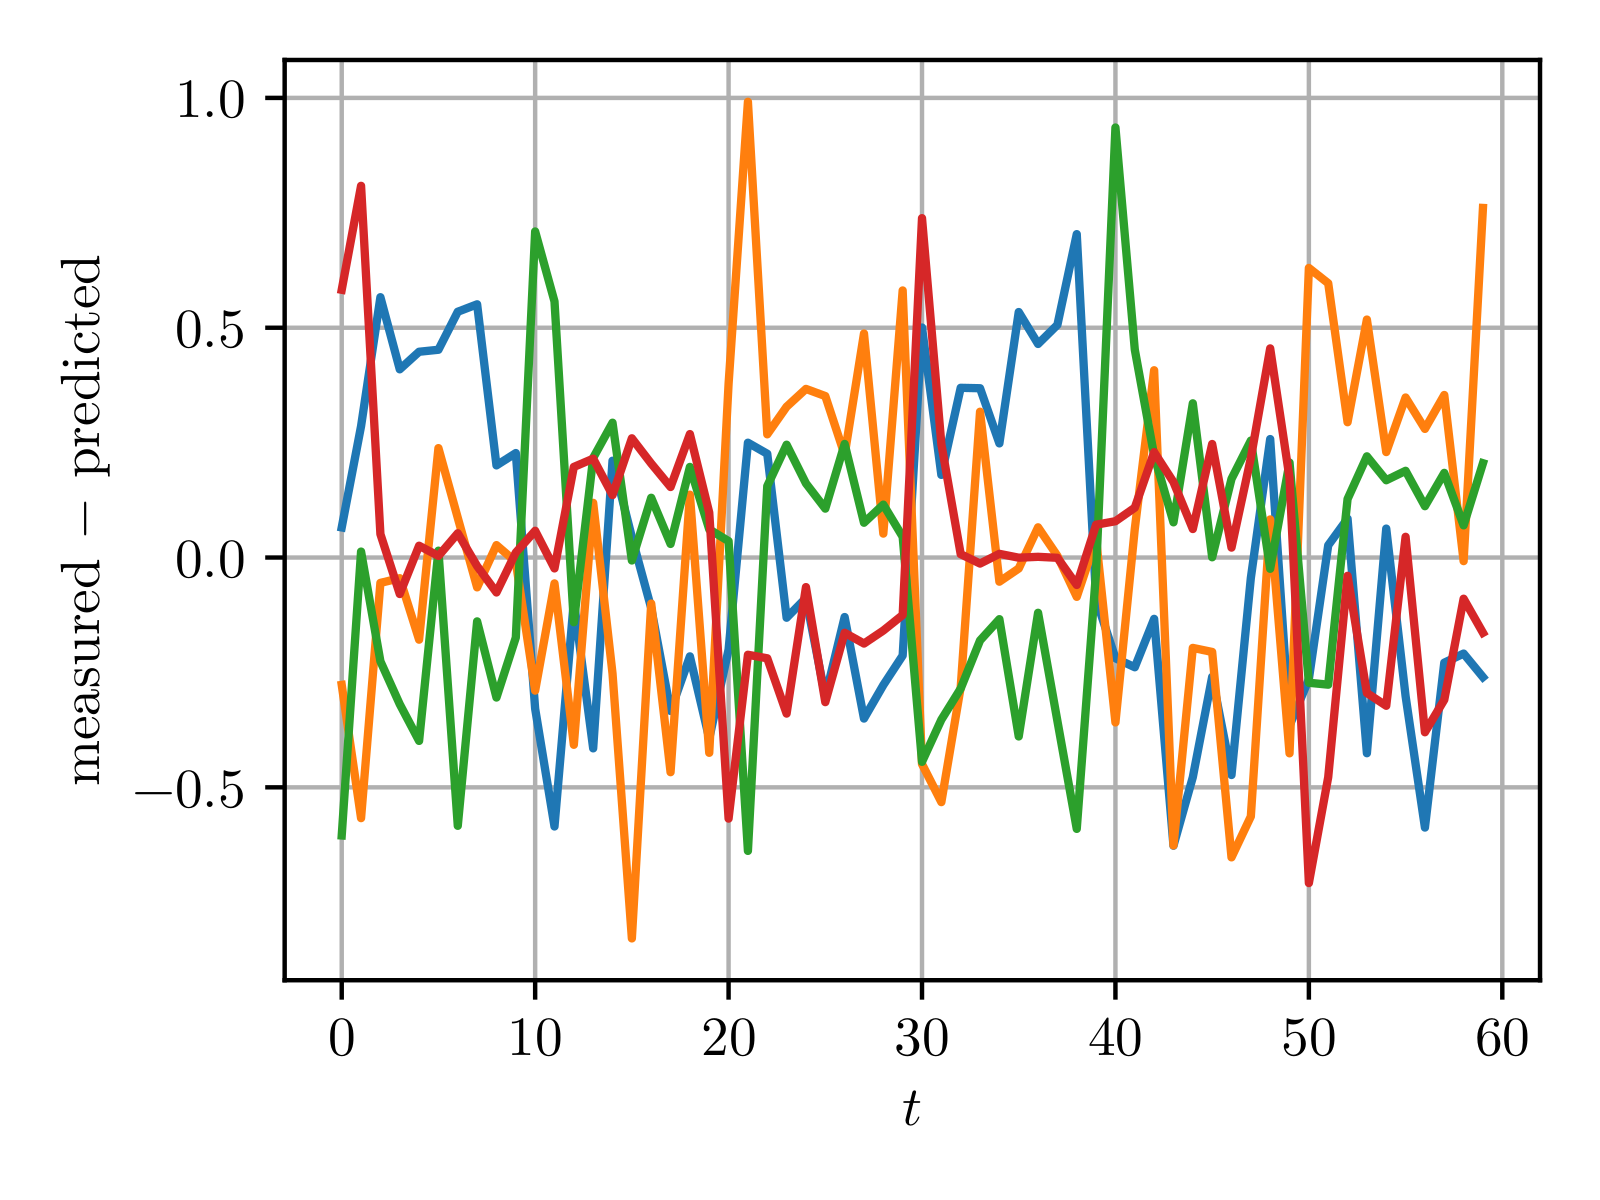
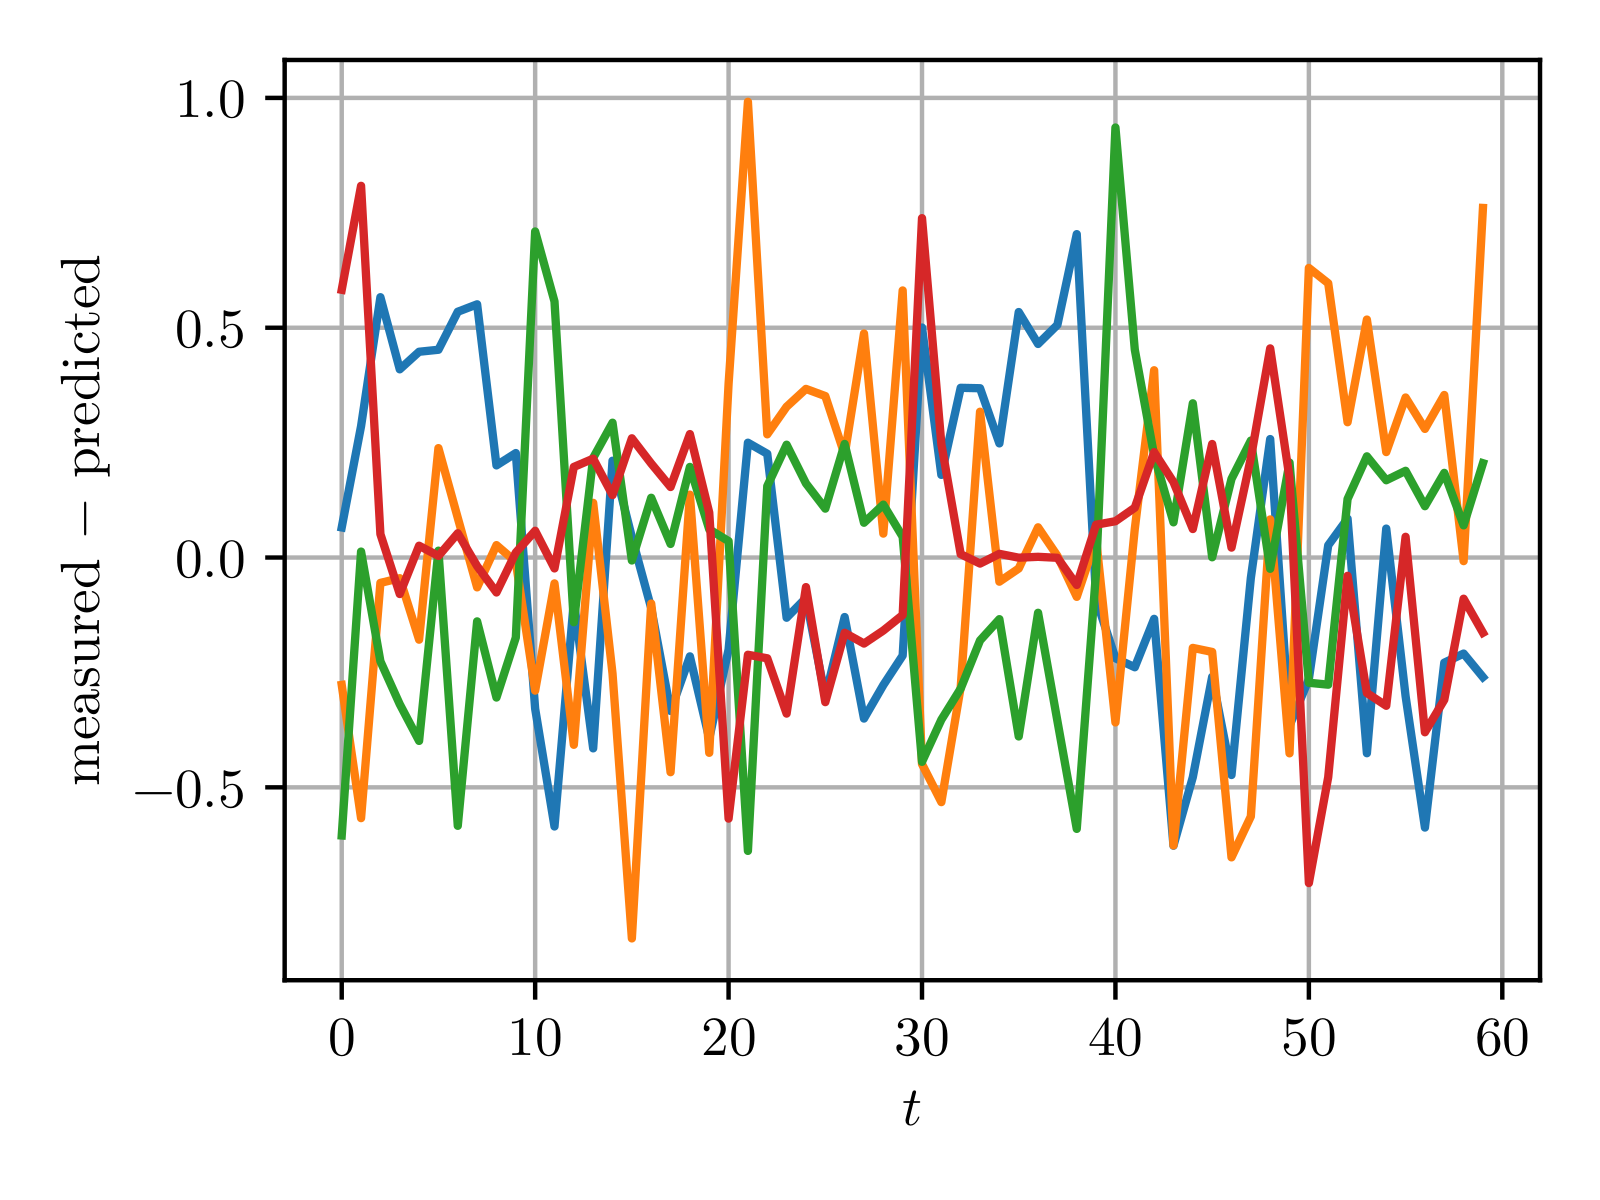
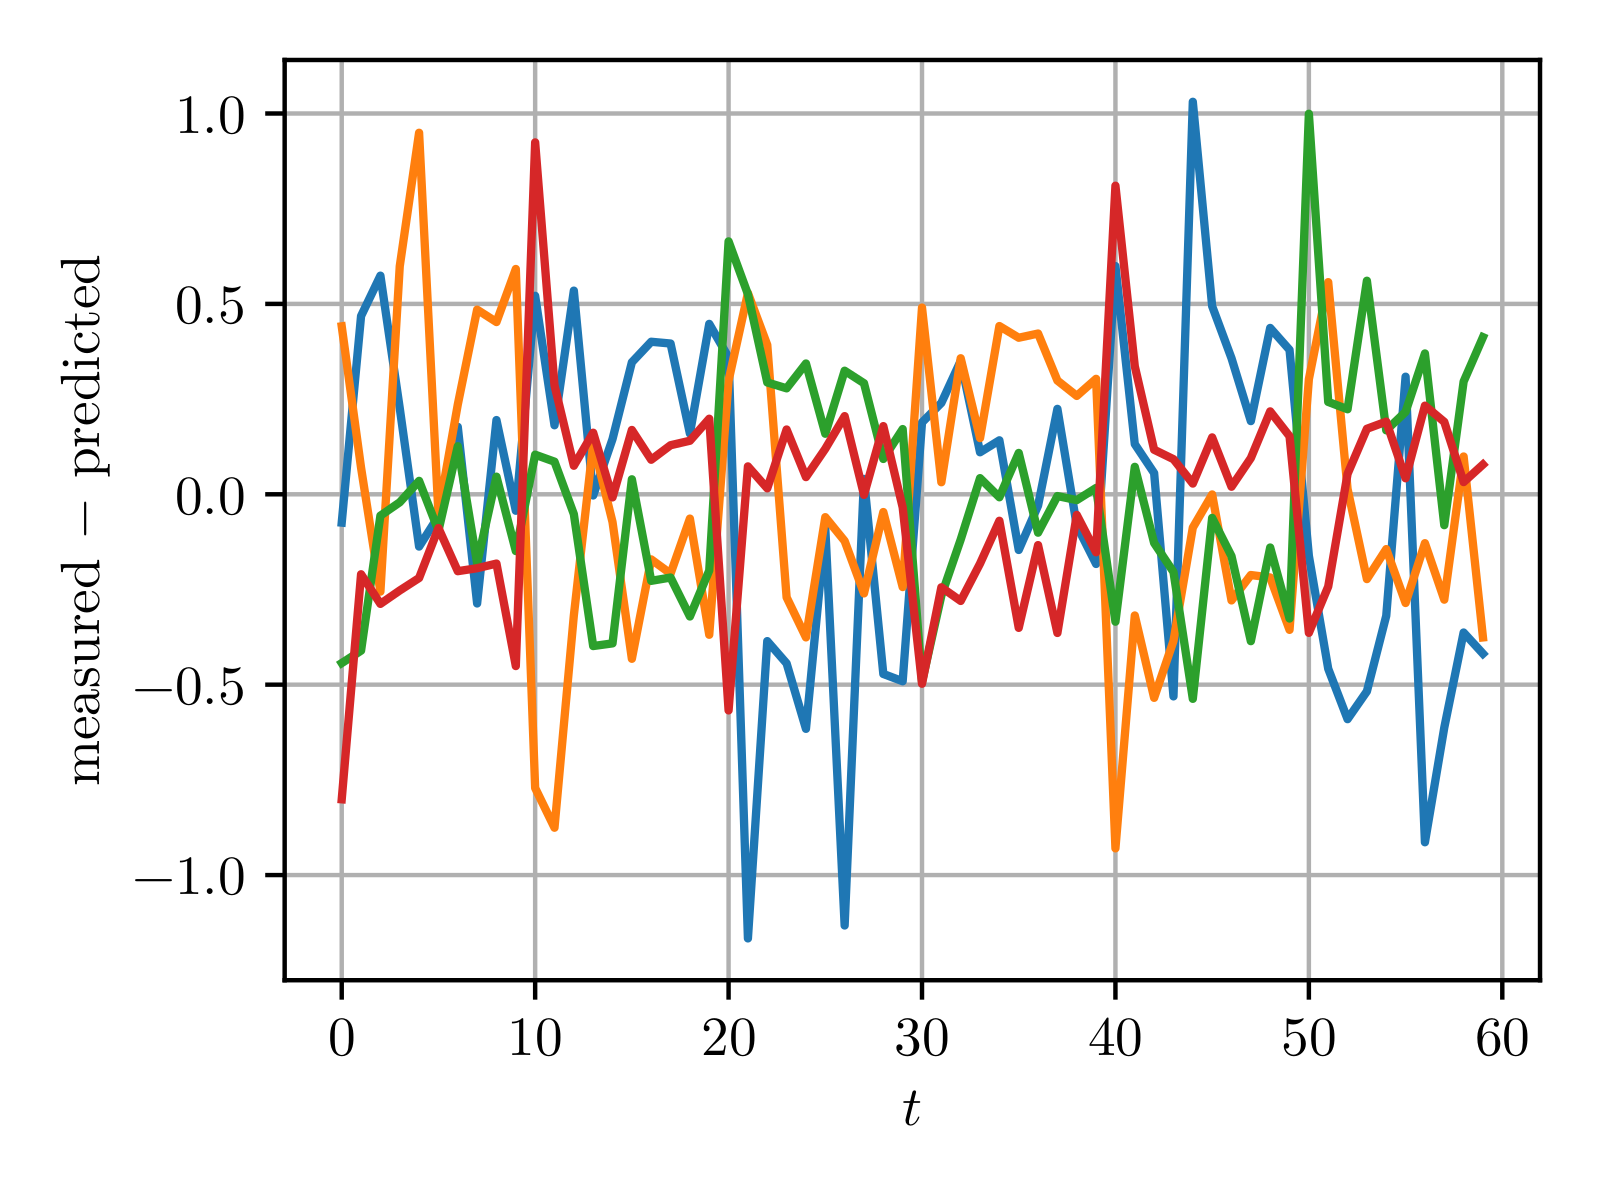
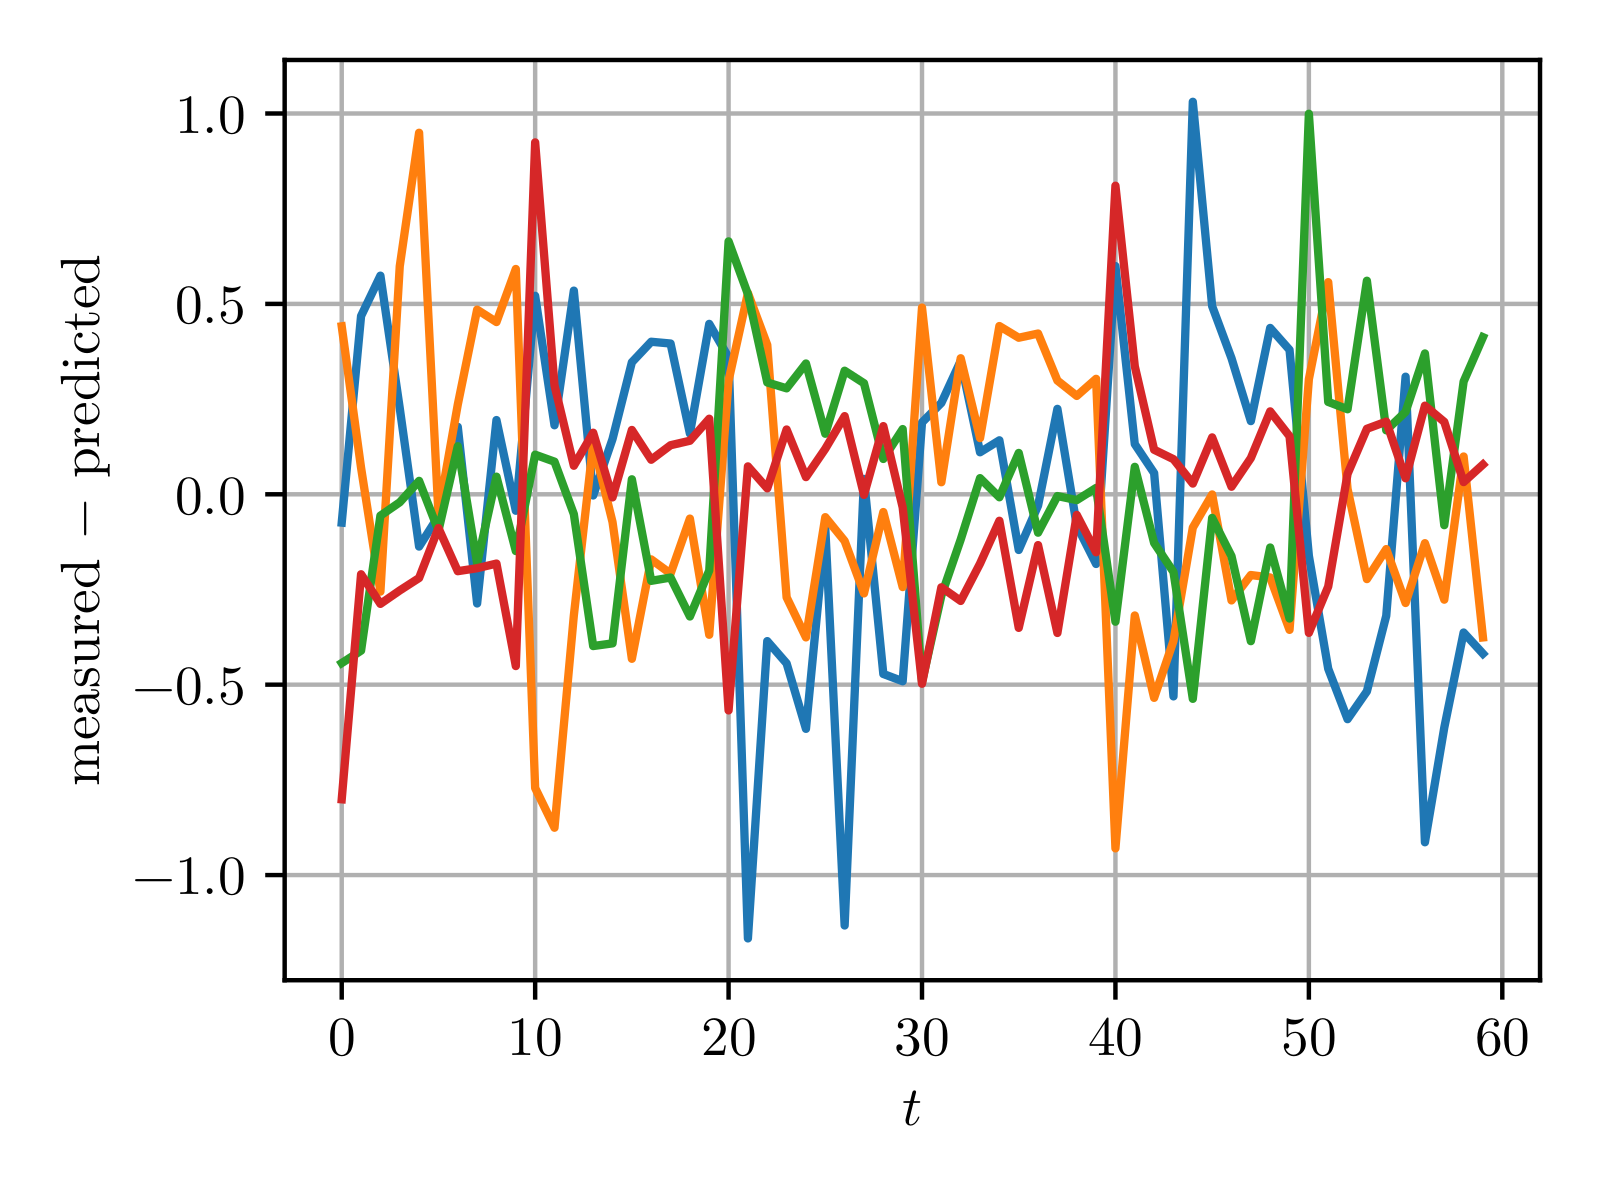

In [12]:
ftl.img_grid([
    plot(X[:, 0, 90:150], X_pred[:, 0, 90:150], 'res_x'),
    plot(X[:, 1, 90:150], X_pred[:, 1, 90:150], 'res_y'),
], n_columns=2)